In [17]:
import numpy as np
import pandas as pd
import duckdb as db

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

from scipy import stats

# Pretty printing
#pd.set_option("display.precision", 6)
rng_seed = 99

In [46]:
df = pd.concat([
    pd.DataFrame({'distribution':'normal', 'value':stats.norm.rvs(loc=50, scale=5, size=20_000, random_state=rng_seed)}),
    pd.DataFrame({'distribution':'skew_normal', 'value':stats.skewnorm.rvs(a=10, loc=50, scale=5, size=2_000, random_state=rng_seed)})
])

df

,distribution,value
0,normal,49.288206
1,normal,60.286109
2,normal,51.416310
3,normal,56.649060
4,normal,49.226891
...,...,...
1995,skew_normal,55.370639
1996,skew_normal,56.365783
1997,skew_normal,52.234641
1998,skew_normal,50.392822


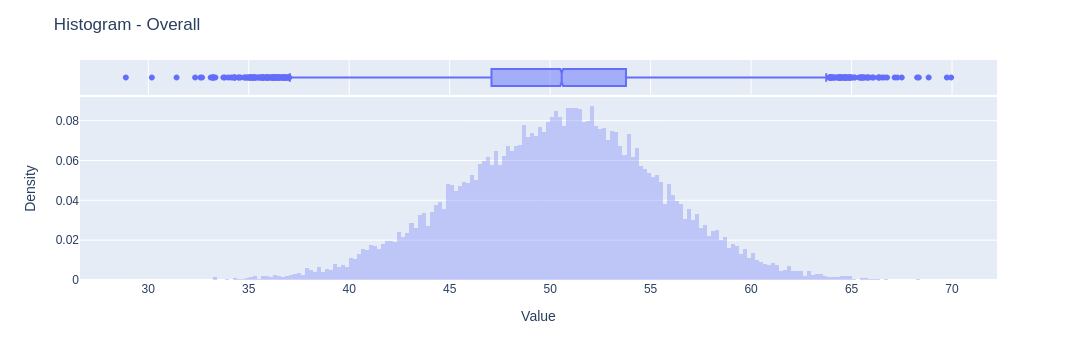

In [50]:
fig = px.histogram(
    df,
    x = "value",
    histnorm = "probability density",
    marginal = "box",
    opacity = 0.3
)
fig.update_layout(
    title = "Histogram - Overall",
    xaxis_title = "Value",
    yaxis_title = "Density"
)

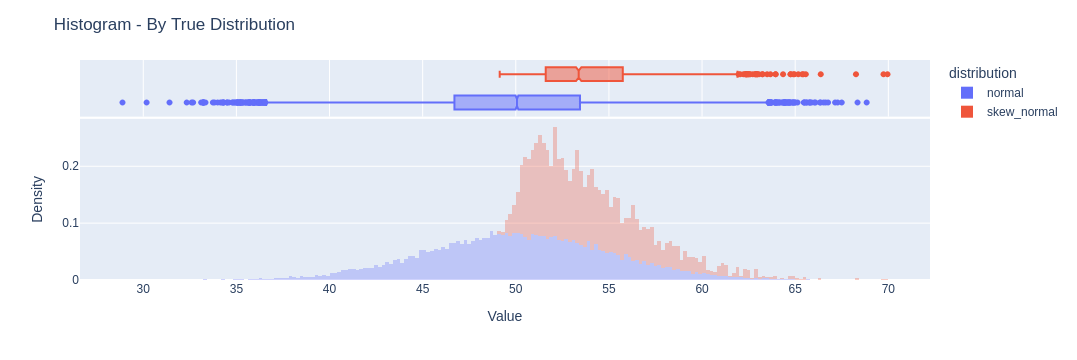

In [49]:
fig = px.histogram(
    df,
    x = "value",
    color = "distribution",
    histnorm = "probability density",
    marginal = "box",
    opacity = 0.3
)
fig.update_layout(
    title = "Histogram - By True Distribution",
    xaxis_title = "Value",
    yaxis_title = "Density"
)

In [55]:
def cutoff_iqr(data):
    import scipy
    import numpy
    iqr_value = scipy.stats.iqr(data, rng=(25,75))
    iqr_lo = numpy.percentile(data, 25) - 1.5 * iqr_value
    iqr_hi = numpy.percentile(data, 75) + 1.5 * iqr_value
    return iqr_lo, iqr_hi

def cutoff_zscore(data):
    import numpy
    mean_value = numpy.mean(data)
    sd_value = numpy.std(data)
    zscore_lo = mean_value - 3 * sd_value
    zscore_hi = mean_value + 3 * sd_value
    return zscore_lo, zscore_hi

In [56]:
cutoff_iqr(df['value'])

(np.float64(37.04292100363647), np.float64(63.811230760446215))

In [57]:
cutoff_zscore(df['value'])

(np.float64(35.40534609950063), np.float64(65.42208442365191))

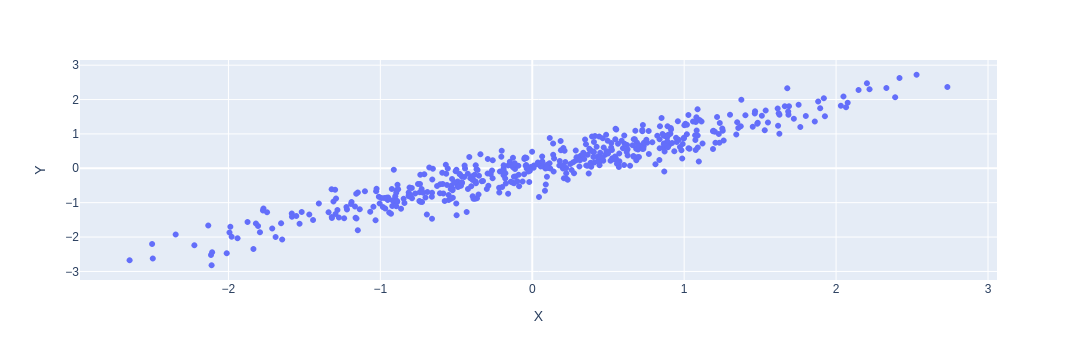

In [64]:
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

# Simulate two highly positively correlated variables
np.random.seed(0)
mean = [0, 0]
cov = [[1,    0.95], 
       [0.95, 1   ]]  # High positive correlation
X = np.random.multivariate_normal(mean, cov, 500)
df = pd.DataFrame(X, columns=['X', 'Y'])

# # Mean and inverse covariance for Mahalanobis distance
# mean_vec = np.mean(X, axis=0)
# cov_inv = inv(np.cov(X.T))

# # Calculate Mahalanobis distances
# distances = {k: mahalanobis(v, mean_vec, cov_inv) for k, v in points.items()}

# # Plot data
fig=px.scatter(df, x = 'X', y = 'Y')
fig.show()
